In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [145]:
data=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\Clustering_Assingment\EastWestAirlines_data.csv')

In [146]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [151]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### There is no null value.

In [5]:
data1=data.drop(['ID#'],axis=1)
data1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [6]:
# Normalization function
def norm_func(data_column):
   x=(data_column-data_column.min())/(data_column.max()-data_column.min())
   return(x)

In [7]:
data1.iloc[:,data1.columns!='Award?']

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [9]:
df_norm=norm_func(data1)

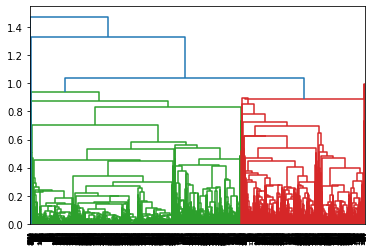

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [67]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [68]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [69]:
data1_cluster = data1.copy()
data1_cluster['h_clusterid'] = Clusters

In [70]:
# Use groupby and
x=data1_cluster.groupby('h_clusterid')
x.median()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,55406.0,0.0,3.0,1.0,1.0,19223.0,15.0,0.0,0.0,4666.0,1.0
1,37233.5,0.0,1.0,1.0,1.0,3309.0,8.0,0.0,0.0,3726.5,0.0


### KMEANS

In [71]:
from sklearn.metrics import silhouette_score

In [72]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data1_df = scaler.fit_transform(data1.iloc[:,data1.columns!='Award?'])
scaled_data1_df# Standardisation function 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

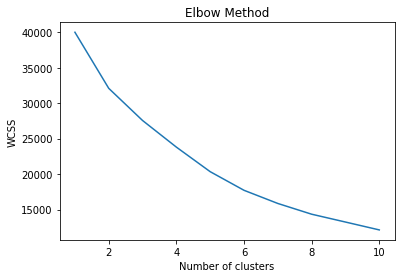

In [73]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
wcss

[39989.99999999997,
 32088.27969959076,
 27558.746693503097,
 23807.814212456375,
 20348.78522308945,
 17725.103091569195,
 15871.129655961282,
 14358.328251155728,
 13254.650313322792,
 12145.069447717944]

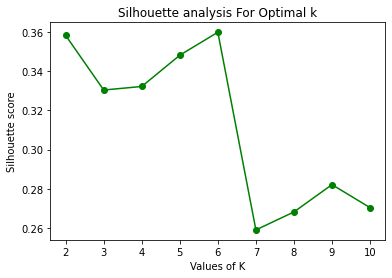

In [75]:
silhouette_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data1_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_data1_df, cluster_labels))
plt.plot(range(2, 11),silhouette_avg,'go-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [76]:
silhouette_avg

[0.35826638416515033,
 0.330411996315242,
 0.3322237914091003,
 0.34818137095348617,
 0.35990130799241493,
 0.2590199600553473,
 0.26819091939498757,
 0.2821304457163712,
 0.27039271048441627]

In [77]:
kmeans = KMeans(n_clusters=6,random_state=0)
predict=kmeans.fit_predict(scaled_data1_df)

In [78]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaled_data1_df)

KMeans(n_clusters=6, random_state=42)

In [79]:
clusters_new.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [80]:
#Assign clusters to the data set
#data1_k_means = data1.copy()
data1_cluster['k_means_id'] = clusters_new.labels_

In [81]:
data1_cluster.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_means_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2


In [82]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-3.23159755e-01, -4.63862895e-02, -7.32975481e-01,
        -9.82418871e-02, -6.03983314e-02, -5.75433752e-01,
        -6.61079297e-01, -1.70744676e-01, -1.86513408e-01,
        -2.35628929e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01],
       [ 1.32683404e+00,  1.45063438e-01,  1.81906670e+00,
        -9.82418871e-02, -4.99281801e-02,  2.03551227e+00,
         1.02228940e+00,  7.50209985e-02,  9.18109225e-02,
         6.12107764e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
         6.17851143e-01,  8.75493989e-02,  2.20346809e-01,
        -7.24639805e-02],
       [ 1.22804697e-02, -6.13972644e-02,  7.07273917e-01,
        -9.82418871e-02, -5.86120612e-02,  2.58827633e-01,
         5.96524179e-01, -1.66878544e-01, -1.83611593e-01,
         1.

In [83]:
data1_cluster.groupby('k_means_id').agg(['mean']).reset_index()

,k_means_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,41038.760518,108.231623,1.050393,1.000000,1.000462,3249.301896,5.253814,221.007397,0.666204,3632.014794,0.221452,0.778548
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.466667
2,2,208330.192500,255.690000,4.565000,1.000000,1.002500,66196.032500,21.497500,568.050000,1.752500,5389.770000,0.660000,0.340000
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.604651
4,4,74838.745337,96.619627,3.033252,1.000000,1.000811,23395.002433,17.330089,226.420114,0.677210,4504.137064,0.488240,0.511760
5,5,171889.696552,818.062069,2.048276,1.000000,1.000000,28751.503448,26.827586,5673.620690,16.531034,4584.068966,0.765517,0.234483


In [84]:
data1_cluster[data1_cluster['k_means_id']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_means_id
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
11,96522,0,5,1,1,61105,19,0,0,6924,1,0,2
20,120576,0,5,1,1,58831,23,250,2,6896,1,0,2
32,276571,0,4,1,1,42044,23,0,0,7872,0,1,2
35,123759,0,4,1,1,50572,23,2500,5,7865,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,70178,0,5,1,1,61530,12,1300,6,3306,1,0,2
3772,822321,0,5,1,1,138334,26,600,2,3288,1,0,2
3822,166638,0,5,1,1,64572,22,0,0,1697,0,1,2
3855,190730,0,5,1,1,78916,28,2450,9,1648,1,0,2


In [85]:
data1_cluster[data1_cluster['k_means_id']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_means_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [111]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

### DBSCAN

In [86]:
from sklearn.cluster import DBSCAN

In [136]:
dbscan = DBSCAN(eps = 5, min_samples=15)
dbscan.fit_predict(scaled_data1_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
dbscan

DBSCAN(eps=5, min_samples=15)

In [138]:
# Noisy samples are given  the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
data1_cluster['db_cluster'] = dbscan.labels_

In [140]:
data1_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,k_means_id,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,4,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


In [141]:
print("\nCluster id for hierarchical clustering\n")
print(data1_cluster['h_clusterid'].value_counts())
print("\nCluster id for kmeans clustering\n")
print(data1_cluster['k_means_id'].value_counts())
print("\nCluster id for dbscan clustering\n")
print(data1_cluster['db_cluster'].value_counts())


Cluster id for hierarchical clustering

1    2518
0    1481
Name: h_clusterid, dtype: int64

Cluster id for kmeans clustering

0    2163
4    1233
2     400
5     145
3      43
1      15
Name: k_means_id, dtype: int64

Cluster id for dbscan clustering

 0    3929
 1      28
-1      27
 2      15
Name: db_cluster, dtype: int64


### inferences
###### 1. For hierarchical clustering based on dendogram we have created two clusters. Hence hirarchical clustering creates two group of data based on their characterstics.
###### 2. For KMEANS clustering using elbow curve and silhouette curve we have created 6 clusters of data. Hence KMEANS clustering creates 6 gruops of data based on their characterstics.
###### 3. For DBscan clustering based on there parameters 4 clusters has created. There are 27 samples are noisy and lable as -1.